### Importing Libraries

In [2]:
#!pip install opencv-python
#!pip install imutils
#!pip install cmake
#!pip install dlib

  Using cached dlib-19.21.0.tar.gz (3.2 MB)
  Created wheel for dlib: filename=dlib-19.21.0-cp37-cp37m-win_amd64.whl size=3175330 sha256=a91b2e9759d5239b2cddf3ebe6381478aeb5e7fe938b08442d62fb40dd938fa4
  Stored in directory: c:\users\codebug\appdata\local\pip\cache\wheels\d8\8f\ac\70af71fd636fb03b238ca3f183e64f5dfdb5e4ffffeff89ce6
Successfully built dlib


In [3]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import imutils
from imutils import face_utils
from scipy.spatial import distance
import dlib
import IPython
from IPython.display import Audio
import argparse
import winsound
#import pygame

### Define Helper Functions

In [4]:
def showImg(img, title = ''):
    plt.figure(figsize =(20,15));
    plt.title(title)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
def showGrayImg(img, title = ''):
    plt.figure(figsize =(20,15));
    plt.title(title)
    plt.imshow(img, cmap = 'gray')

In [5]:
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

In [6]:
# initialize dlib's face detector
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [8]:
# Load sound
filename = 'audio/alert.wav'
winsound.PlaySound(filename, winsound.SND_FILENAME)

### HAAR Cascades for face detection

#### Without Glasses

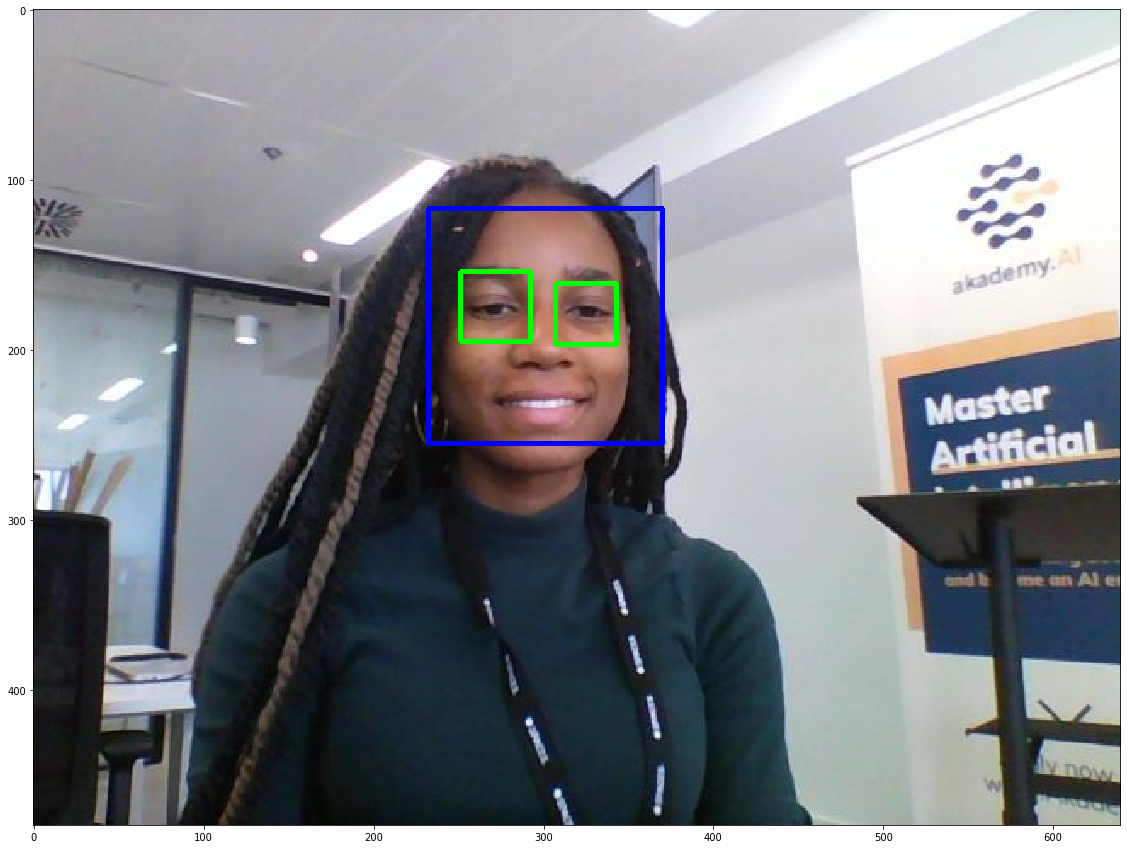

In [9]:
img = cv2.imread('wendy.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
showImg(img)
# cv2.imshow('image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows() 

#### With Glasses

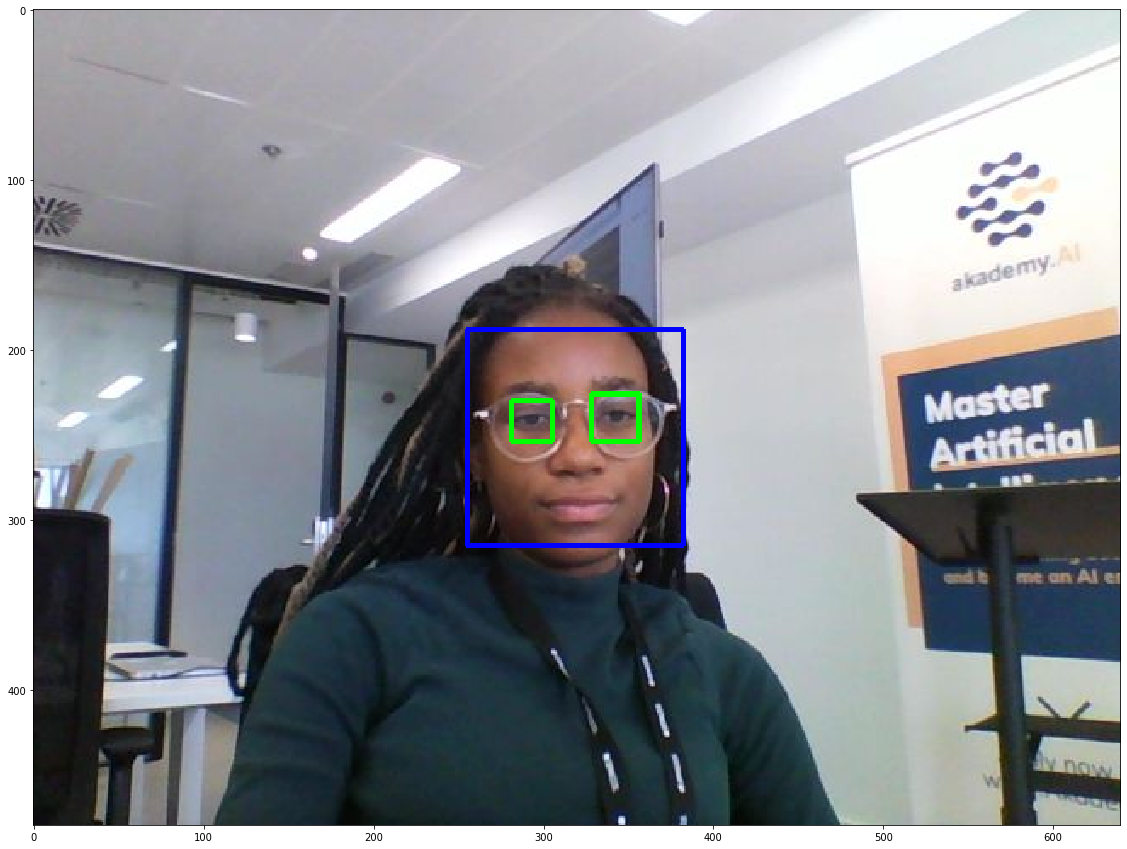

In [10]:
img = cv2.imread('glasses.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
showImg(img)
# cv2.imshow('image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows() 

### HAAR CASCADE VIDEO

In [ ]:
video_capture = cv2.VideoCapture(0)

#read frames from webcam
while True:
  ret, frame = video_capture.read()
  frame = cv2.flip(frame,1)
  #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  
  faces = face_classifier.detectMultiScale(frame, 1.3, 5)
  
  for (x,y,w,h) in faces:
    cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    
    eyes = eye_classifier.detectMultiScale(roi_gray)
    
    for (ex,ey,ew,eh) in eyes:
      cv2.rectangle(roi_color,(ex,ey), (ex+ew, ey+eh), (0,255,0), 2)
      
  #cv2_imshow( frame)
  cv2.imshow('frame',frame)
  if(cv2.waitKey(1) & 0xFF == ord('q')):
    break
    
video_capture.release()
cv2.destroyAllWindows()

In [ ]:
video_capture = cv2.VideoCapture(0)

#read frames from webcam
while True:
    
    ret, frame = video_capture.read()
    frame = cv2.flip(frame,1)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  
    faces = face_classifier.detectMultiScale(frame, 1.3, 5)
    rects = detector(gray, 1)

 #rects = detector(gray, 0)
    
    # For each detected face, find the landmark.
    for (i, rect) in enumerate(rects):
        # Make the prediction and transfom it to numpy array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
    
        # Draw on our image, all the finded cordinate points (x,y) 
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
      
  #cv2_imshow( frame)
    cv2.imshow('frame',frame)
    if(cv2.waitKey(1) & 0xFF == ord('q')):
        break
    
video_capture.release()
cv2.destroyAllWindows()

### Facial Landmarks Recognition

#### Without Glasses

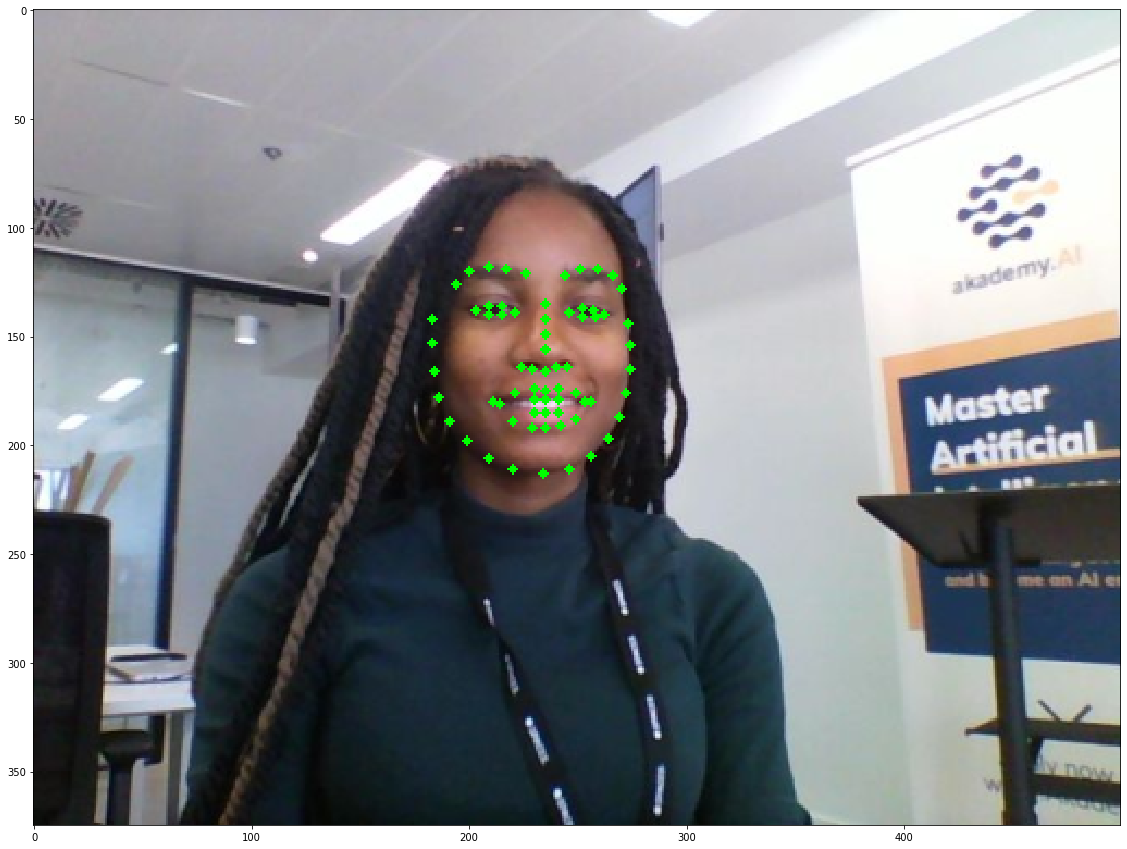

In [11]:
# load the input image, resize it, and convert it to grayscale
image = cv2.imread('wendy.jpg')
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)

 #rects = detector(gray, 0)
    
    # For each detected face, find the landmark.
for (i, rect) in enumerate(rects):
        # Make the prediction and transfom it to numpy array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    
        # Draw on our image, all the finded cordinate points (x,y) 
    for (x, y) in shape:
         cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

            
showImg(image)
#     # Show the image
# cv2.imshow("Output", image)
#     # visualize all facial landmarks with a transparent overlay


# cv2.waitKey(0)
# cv2.destroyAllWindows()

#### With Glasses

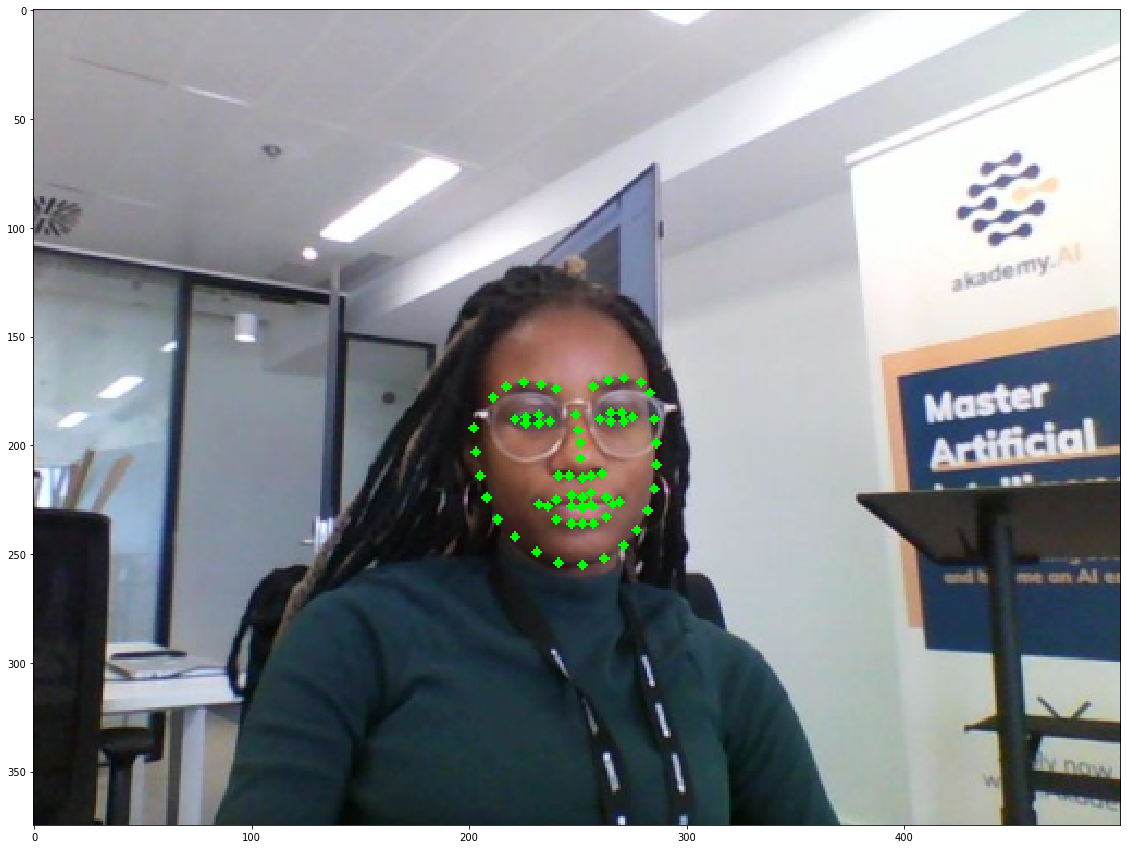

In [12]:
# load the input image, resize it, and convert it to grayscale
image = cv2.imread('glasses.jpg')
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)

 #rects = detector(gray, 0)
    
    # For each detected face, find the landmark.
for (i, rect) in enumerate(rects):
        # Make the prediction and transfom it to numpy array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    
        # Draw on our image, all the finded cordinate points (x,y) 
    for (x, y) in shape:
         cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
    
showImg(image)
    #     # Show the image
# cv2.imshow("Output", image)
#     # visualize all facial landmarks with a transparent overlay


# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Apply EAR to Image

In [13]:
img = cv2.imread('sleepy.jpg')
sound = 'audio/alert.wav'
alarm_on = False
thresh = 0.25
detector = dlib.get_frontal_face_detector()
predictor_path = "shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(predictor_path)

def eye_aspect_ratio(eye):
  A = distance.euclidean(eye[1], eye[5])
  B = distance.euclidean(eye[2], eye[4])
  C = distance.euclidean(eye[0], eye[3])
  ear = (A + B)/ (2.0 * C)
  return ear

(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]




gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = detector(gray, 0)
face_rectangle = face_classifier.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in face_rectangle:
  cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
  
for face in faces:
  
  shape = predictor(gray,face)
  shape = face_utils.shape_to_np(shape)
  
  leftEye = shape[lStart:lEnd]
  rightEye = shape[rStart:rEnd]

  #Calculate aspect ratio of both eyes
  leftEyeAspectRatio = eye_aspect_ratio(leftEye)
  rightEyeAspectRatio = eye_aspect_ratio(rightEye)
  
  eyeAspectRatio = (leftEyeAspectRatio + rightEyeAspectRatio) / 2
  
  leftEyeHull = cv2.convexHull(leftEye)
  rightEyeHull = cv2.convexHull(rightEye)
  cv2.drawContours(img, [leftEyeHull], -1, (0, 255, 0), 1)
  cv2.drawContours(img, [rightEyeHull], -1, (0, 255, 0), 1)
  
  if(eyeAspectRatio < thresh):
        cv2.putText(img, "****************ALERT!****************", (15, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
#         cv2.putText(img, "****************ALERT!****************", (10,425),
#                 cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    #cv2.putText(img,"SLEEPY!!!",(120,0), cv2.FONT_HERSHEY_COMPLEX, 1 ,(0,0,255), 2)
    
  else:
    cv2.putText(img, "****************Awake!****************", (15, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2) 
#     print("You're wide awake")
    
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
sound = 'audio/alert.wav'
def hello(sound): 
    return IPython.display.Audio(sound, autoplay=True)
    

In [15]:
num = 1
if (num >0):
    hello(sound)

## EAR LIVE DEMO

In [16]:
flag = 0
frame_check = 20
thresh = 0.25
sound = 'audio/alert.wav'
detector = dlib.get_frontal_face_detector()
predictor_path = "shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(predictor_path)

cap = cv2.VideoCapture(0)
flag = 0
while True:
    ret,frame = cap.read()
    frame = imutils.resize(frame, width = 450)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray, 0)
    face_rectangle = face_classifier.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in face_rectangle:
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
    for face in faces:
  
      shape = predictor(gray,face)
      shape = face_utils.shape_to_np(shape)
  
      leftEye = shape[lStart:lEnd]
      rightEye = shape[rStart:rEnd]
        
    
    
    #Calculate aspect ratio of both eyes
      leftEyeAspectRatio = eye_aspect_ratio(leftEye)
      rightEyeAspectRatio = eye_aspect_ratio(rightEye)

      eyeAspectRatio = (leftEyeAspectRatio + rightEyeAspectRatio) / 2

      leftEyeHull = cv2.convexHull(leftEye)
      rightEyeHull = cv2.convexHull(rightEye)
      cv2.drawContours(img, [leftEyeHull], -1, (0, 255, 0), 1)
      cv2.drawContours(img, [rightEyeHull], -1, (0, 255, 0), 1)

      if(eyeAspectRatio < thresh):
        flag += 1
        #print (flag)
        if flag >= frame_check:
            
            Audio(sound, autoplay=True)
            cv2.putText(frame, "****************ALERT!****************", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            cv2.putText(frame, "****************ALERT!****************", (10,325),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            #cv2.putText(img, text, (textX, textY ), font, 2, (0, 0, 255), 2)
        #cv2.putText(img,"SLEEPY!!!",(120,0), cv2.FONT_HERSHEY_COMPLEX, 1 ,(0,0,255), 2)

      else:
        flag = 0
        #cv2.putText(img, text2, (text2X, text2Y ), font, 1, (0, 0, 255), 2)
        #cv2.putText(img,"You're wide awake",(120,25), cv2.FONT_HERSHEY_COMPLEX, 1 ,(0,0,255), 2)   
    
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        cv2.destroyAllWindows()
        cap.release()
        break
